<h1> Initialize, and Load Presaved HDE Coords </h1>

In [1]:
import os, pickle, time, glob, sys, copy
import numpy as np 
import scipy
import mdtraj as md 
import MDAnalysis as mda
import nglview as nv 
from ipywidgets import interactive, VBox
import sklearn.preprocessing as pre
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import pyemma as py 
from pyemma.util.contexts import settings
import warnings
warnings.filterwarnings('ignore')

os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '1' 


import tensorflow as tf
import keras.backend as K
from keras.models import load_model
from keras.callbacks import EarlyStopping
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.tensorflow_backend.set_session(tf.Session(config=config))


import sys
from hde import *#__init__, hde, propagator, molgen, analysis #



source_folds = "/media/joseph/Memorex USB/liew/Joe_Liew_LSS/Joe_Liew_LSS/DNA_Traj/"
full_source_folds = "/media/joseph/Memorex USB/liew/Joe_Liew_LSS/Joe_Liew_LSS/DNA_Traj/trajs/DNA/"
avail_srvs = [0,1,2,3,20,21,22,23]






##traj names



traj_names =[
"AT-all-implicit-dis-0-0_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-1_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-2_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-3_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-4_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-5_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-6_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-7_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-8_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-9_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-10_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-11_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-12_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-13_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-14_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-15_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-16_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-17_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-18_T-309_t-20_s-13e+09",
"AT-all-implicit-dis-0-19_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-0_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-1_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-2_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-3_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-4_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-5_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-6_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-7_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-8_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-9_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-10_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-11_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-12_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-13_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-14_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-15_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-16_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-17_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-18_T-309_t-20_s-13e+09",
"AT-all-implicit-hbr-0-19_T-309_t-20_s-13e+09"
]

for i in avail_srvs:
    print(traj_names[i])

num_srvs = len(avail_srvs)
traj_frame_length = 250000
hde_coords = np.zeros((num_srvs*traj_frame_length, 5))
for i in range(num_srvs):
    hde_coords[i*traj_frame_length:(i+1)*traj_frame_length, :] = np.load(source_folds+str(avail_srvs[i])+"_full_srv.npy")


/home/joseph/anaconda3/envs/lss/lib/python3.6/site-packages/Bio/KDTree/__init__.py:25: BiopythonDeprecationWarning: Bio.KDTree has been deprecated, and we intend to remove it in a future release of Biopython. Please use Bio.PDB.kdtrees instead, which is functionally very similar.
  BiopythonDeprecationWarning)
/home/joseph/anaconda3/envs/lss/lib/python3.6/site-packages/MDAnalysis/due.py:88: UserWarning: No module named 'duecredit'
  warnings.warn(str(err))
Using TensorFlow backend.


AT-all-implicit-dis-0-0_T-309_t-20_s-13e+09
AT-all-implicit-dis-0-1_T-309_t-20_s-13e+09
AT-all-implicit-dis-0-2_T-309_t-20_s-13e+09
AT-all-implicit-dis-0-3_T-309_t-20_s-13e+09
AT-all-implicit-hbr-0-0_T-309_t-20_s-13e+09
AT-all-implicit-hbr-0-1_T-309_t-20_s-13e+09
AT-all-implicit-hbr-0-2_T-309_t-20_s-13e+09
AT-all-implicit-hbr-0-3_T-309_t-20_s-13e+09


In [2]:
#earlyStopping = EarlyStopping(monitor='val_loss', patience=30, verbose=1, mode='min', restore_best_weights=True)

lag = 12   # x 100 ps save rate = 1.2 ns
is_reversible = True

n_mix = 25
lag_prop = lag
lr_prop = 0.0001


hde = HDE(
    100, 
    n_components=6, 
    lag_time=lag,
    reversible=is_reversible, 
    n_epochs=300,
    learning_rate=0.0005,
    hidden_layer_depth=2,
    hidden_size=100,
    activation='tanh', 
    batch_size=20000,
    batch_normalization=True,
    #callbacks=[earlyStopping], 
    verbose=True
)

In [3]:
hde = pickle.load(open('/media/joseph/Memorex USB/liew/MikeDNA-SRV/pretrained_srvs/sm-5_k-0_lag-12_ep-20_AT-all_dist_309K_40-250000-190.pkl', 'rb'))

<h1> Initialize Propogator using trained weights </h1>

In [4]:
## num_srvs = len(avail_srvs)
traj_frame_length = 250000
hde_coords = np.zeros((num_srvs*traj_frame_length, 5))
for i in range(num_srvs):
    hde_coords[i*traj_frame_length:(i+1)*traj_frame_length, :] = np.load(source_folds+str(avail_srvs[i])+"_full_srv.npy")

hde_coords2 = np.array([hde_coords[i*traj_frame_length:(i+1)*traj_frame_length] for i in range(num_srvs)])
dim_prop = 2


traj_prop = copy.deepcopy(hde_coords[:,:dim_prop])
prop_scaler = pre.MinMaxScaler(feature_range=(0,1))
traj_prop2 = copy.deepcopy(hde_coords2[:,:,:dim_prop])
prop_scaler2 = pre.MinMaxScaler(feature_range=(0,1))

if dim_prop==1:
    traj_prop_scaled = prop_scaler.fit_transform(traj_prop.reshape(-1, 1))
else:
    traj_prop_scaled = prop_scaler.fit_transform(traj_prop)
    traj_prop_scaled2 = [prop_scaler2.fit_transform(traj_prop2[i]) for i in range(num_srvs)]


In [5]:

lag_time = 12   # x 100 ps save rate = 1.2 ns
is_reversible = False

n_mix = 25
lag_prop = lag_time
lr_prop = 0.0001



callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50, restore_best_weights=True)
]


# In[45]:


prop = Propagator(
    traj_prop_scaled.shape[1], 
    n_components=n_mix, 
    lag_time=lag_prop, 
    batch_size=200000, 
    learning_rate=lr_prop, 
    n_epochs=20000,
    callbacks=callbacks,
    hidden_size=100,
    activation='relu'
)


# In[58]:


from hde.propagator import get_mixture_loss_func


# In[59]:


prop.model.compile(loss=get_mixture_loss_func(prop.input_dim, prop.n_components), optimizer=tf.keras.optimizers.Adam(lr=lr_prop))

prop.model.set_weights(pickle.load(open('prop_weights.pkl', 'rb')))



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
The `logits` property will return `None` when the distribution is parameterized with `logits=None`. Use `logits_parameter()` instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [6]:
obj = prop_scaler.fit(traj_prop)
n_steps = 1000 #np.int(np.floor(np.float(hde_coords.shape[0])/np.float(lag_prop)))
n_traj = 5
synth_trajs_scaled = [prop.propagate(traj_prop_scaled[0].reshape(1,-1).astype(np.float32), n_steps).reshape(n_steps, -1) for item in range(n_traj)]
synth_trajs = [obj.inverse_transform(synth_trajs_scaled[i]) for i in range(n_traj)]

<h1> Initialize Generator Using Trained Weights </h1>

In [15]:
source_folds = "/media/joseph/Memorex USB/liew/Joe_Liew_LSS/Joe_Liew_LSS/DNA_Traj/"
full_source_folds = "/media/joseph/Memorex USB/liew/Joe_Liew_LSS/Joe_Liew_LSS/DNA_Traj/trajs/DNA/"
# #### Setting Up Data
pdb_file = "dna.pdb"
traj_dir = source_folds
trj_file = []
trj_file.append(traj_dir)
print(trj_file)
# In[7]:
stride = 1



['/media/joseph/Memorex USB/liew/Joe_Liew_LSS/Joe_Liew_LSS/DNA_Traj/']


In [17]:
for i in range(num_srvs):
    f = full_source_folds +  str(traj_names[avail_srvs[i]])+"/traj.lammpstrj"
    temp = md.load_lammpstrj(f, stride = stride, top = pdb_file)
    #first 1001 frames not used
    temp = temp[(int(1000/stride)+1):]
    if(i == 0):
        traj_obj = temp
    else:
        traj_obj = md.join(traj_obj, temp)

traj_obj.center_coordinates(mass_weighted=False)
traj_obj.superpose(traj_obj[0])

# ### mdtraj
traj_all = traj_obj
traj_all.superpose(traj_obj[0])
xyz = traj_obj.xyz.reshape(-1, traj_obj.n_atoms*3)


KeyboardInterrupt: 

In [19]:
"""

# In[70]:


xyz_scaler = pre.MinMaxScaler(feature_range=(-1,1))


# In[71]:


y_train = xyz_scaler.fit_transform(xyz)

x_train = traj_prop_scaled

"""


# #### training cWGAN

# In[73]:


molgen = MolGen(
    latent_dim=x_train.shape[1],
    output_dim=y_train.shape[1],
    batch_size=30000,
    noise_dim=50,
    n_epochs=2500,
    hidden_layer_depth=2,
    hidden_size=200,
    n_discriminator=5
)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               10600     
_________________________________________________________________
dense_5 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
Total params: 70,900
Trainable params: 70,900
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 200)               20600     
_________________________________________________________________
dense_8 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_

In [21]:
def swish(x):
    return (K.sigmoid(x) * x)
molgen.generator = tf.keras.models.load_model('molgen_generator.h5', custom_objects={'swish': swish},compile=False)
molgen.discriminator = tf.keras.models.load_model('molgen_discriminator.h5', custom_objects={'swish': swish},compile=False)
molgen.is_fitted = True# need to override after loading to allow molgen.transform to proceed


<h1> Test "Thermo" </h1>


In [22]:
#which psi_i
index = 0
synth_traj = molgen.transform(synth_trajs_scaled[index])

In [23]:
synth_traj.shape
y_train[:,15].shape

(2000000,)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


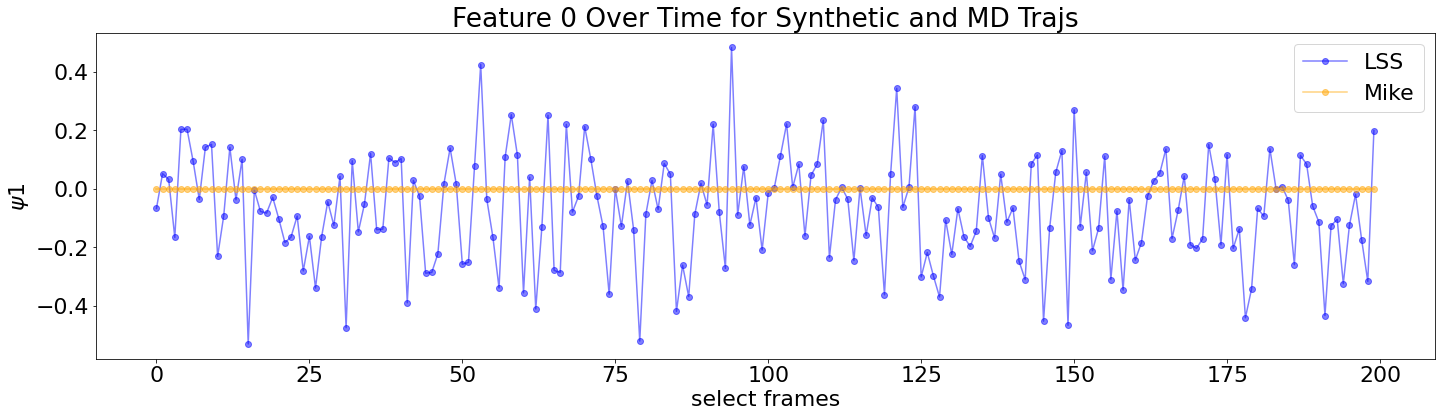

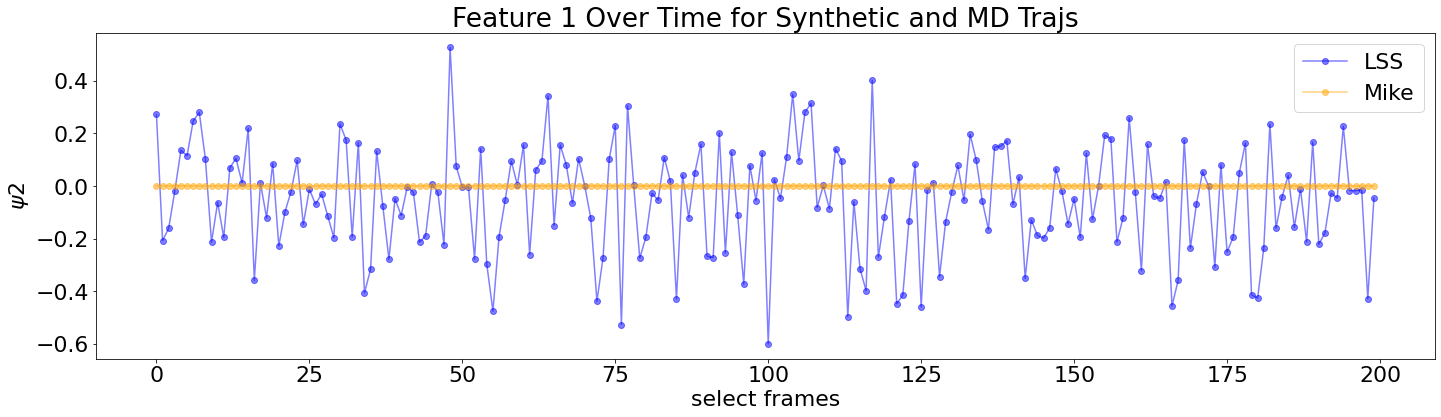

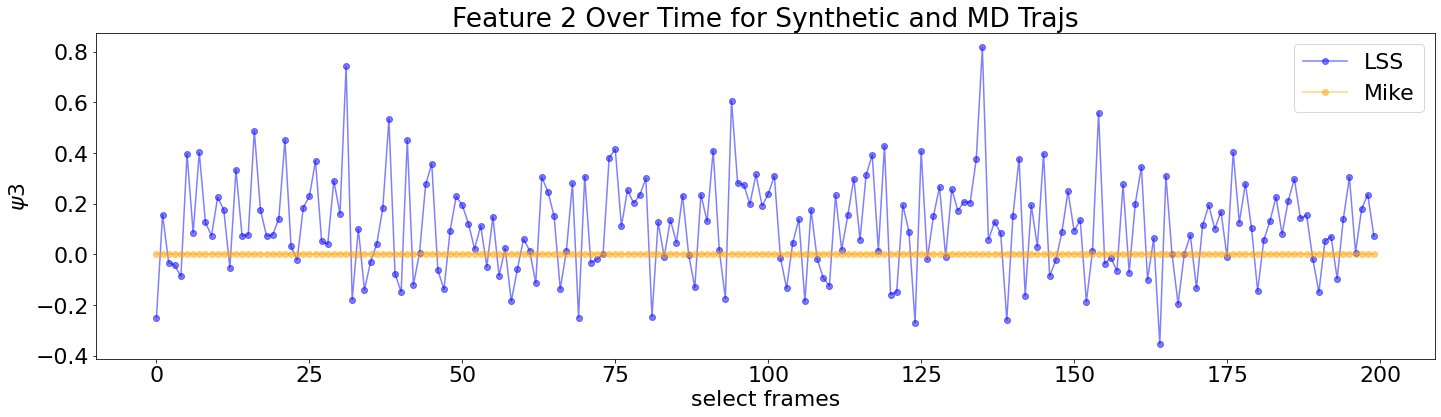

In [24]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)

for i in [0,1,2]:
    feature_id = i
    len_comp = 200
    fig, ax = plt.subplots(figsize=(24, 6))
    ax.plot(synth_traj[:len_comp,feature_id], color='blue', alpha=0.5, marker='o',label="LSS")
    temp = y_train[:len_comp*lag_prop,feature_id]
    ax.plot(temp[::lag_prop], color='orange', alpha=0.5, marker='o',label="Mike")
    ax.set_xlabel(r'select frames')
    ax.set_ylabel(r'$\psi$'+str(feature_id+1))
    ax.set_title("Feature " + str(feature_id) + " Over Time for Synthetic and MD Trajs")
    plt.legend()
    plt.show()

In [25]:
traj_prop.shape

(2000000, 2)

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

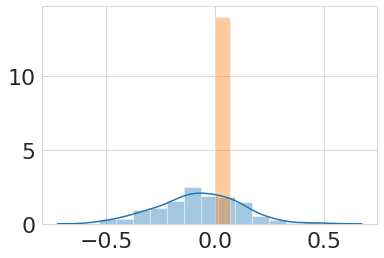

In [27]:
n_bins = 50
import numpy as np
import seaborn as sns


for i in [0,1]:
    feature_id = i
    len_comp = 200
    #plt.hist(synth_traj[:len_comp,feature_id], bins=n_bins)
    sns.set_style('whitegrid')
    sns.distplot(synth_traj[:len_comp,feature_id], label="LSS")
    temp = y_train[:len_comp*lag_prop,feature_id]
    sns.distplot(temp[::lag_prop], label="Mike")
    plt.legend()
    plt.title("Feature "  + str(feature_id))
    plt.xlabel("Feature Coord")
    plt.ylabel("Density")
    plt.show()
plt.tight_layout()

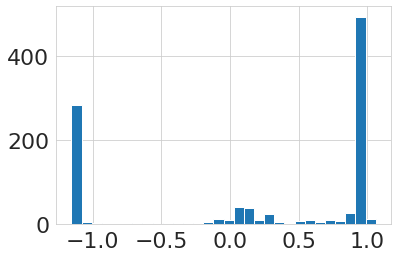

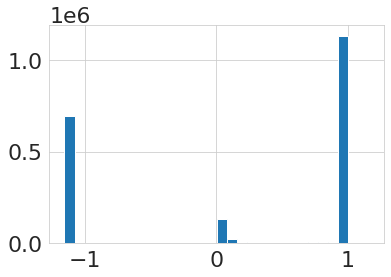

(array([283.,   4.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   2.,
          0.,   1.,   5.,  11.,  10.,  39.,  38.,   9.,  23.,   4.,   3.,
          7.,   8.,   4.,   9.,   6.,  26., 493.,  11.]),
 array([-1.1553138 , -1.0813978 , -1.0074818 , -0.9335658 , -0.8596498 ,
        -0.78573376, -0.71181774, -0.6379017 , -0.5639857 , -0.4900697 ,
        -0.41615367, -0.34223765, -0.26832163, -0.19440562, -0.1204896 ,
        -0.04657358,  0.02734244,  0.10125846,  0.17517447,  0.2490905 ,
         0.3230065 ,  0.39692253,  0.47083855,  0.54475456,  0.6186706 ,
         0.6925866 ,  0.7665026 ,  0.84041864,  0.91433465,  0.9882507 ,
         1.0621667 ], dtype=float32),
 <a list of 30 Patch objects>)

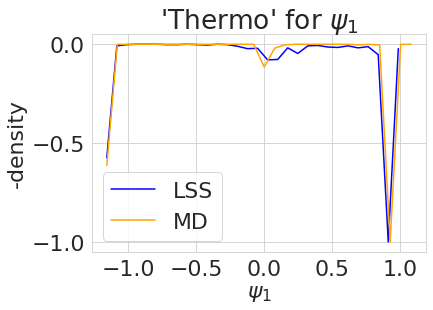

In [28]:
feature_id = 0
len_comp = 1000
a=plt.hist(synth_trajs[1][:len_comp,feature_id], label="LSS",bins = 30)
plt.show()
b=plt.hist(hde_coords[:, feature_id],bins =30)
plt.show()
temp = a[0]
temp = -np.interp(temp, (temp.min(), temp.max()), (0, 1))
temp2 = b[0]
temp2 = -np.interp(temp2, (temp2.min(), temp2.max()), (0, 1))
plt.show()
plt.plot(a[1][:-1],temp, color ="blue", label="LSS")
plt.plot(b[1][:-1], temp2, color = "orange", label="MD")
plt.legend()
plt.title("'Thermo' for $\psi_1$")
plt.ylabel("-density")
plt.xlabel("$\psi_1$")
len(a[0])
a

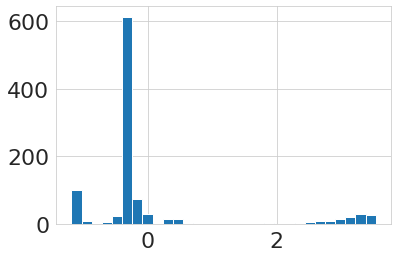

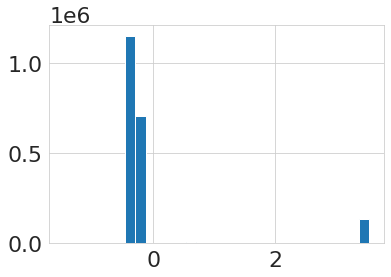

(array([100.,   9.,   2.,   5.,  23., 614.,  75.,  28.,   2.,  15.,  14.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          2.,   4.,   9.,   7.,  13.,  20.,  29.,  27.]),
 array([-1.1867013 , -1.0292228 , -0.87174433, -0.7142658 , -0.5567873 ,
        -0.39930883, -0.24183035, -0.08435186,  0.07312664,  0.23060513,
         0.3880836 ,  0.5455621 ,  0.7030406 ,  0.8605191 ,  1.0179976 ,
         1.1754761 ,  1.3329545 ,  1.4904331 ,  1.6479115 ,  1.80539   ,
         1.9628686 ,  2.120347  ,  2.2778256 ,  2.435304  ,  2.5927825 ,
         2.750261  ,  2.9077394 ,  3.065218  ,  3.2226965 ,  3.3801749 ,
         3.5376534 ], dtype=float32),
 <a list of 30 Patch objects>)

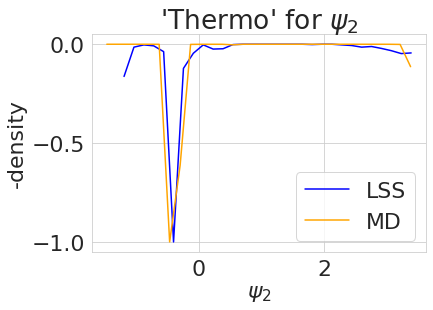

In [30]:
feature_id = 1
len_comp = 1000
a=plt.hist(synth_trajs[1][:len_comp,feature_id], label="LSS",bins = 30)
plt.show()
b=plt.hist(hde_coords[:, feature_id],bins =30)
plt.show()
temp = a[0]
temp = -np.interp(temp, (temp.min(), temp.max()), (0, 1))
temp2 = b[0]
temp2 = -np.interp(temp2, (temp2.min(), temp2.max()), (0, 1))
plt.show()
plt.plot(a[1][:-1],temp, color ="blue", label="LSS")
plt.plot(b[1][:-1], temp2, color = "orange", label="MD")
plt.legend()
plt.title("'Thermo' for $\psi_2$")
plt.ylabel("-density")
plt.xlabel("$\psi_2$")
len(a[0])
a

In [25]:
feature_id = 0
len_comp = 200
fig, ax = plt.subplots(figsize=(24, 6))
ax.plot(synth_traj[:len_comp,feature_id], color='blue', alpha=0.5, marker='o',label="Generated")
ax.plot(y_train[feature_id*250000:feature_id*250000 + len_comp,feature_id], color='orange', alpha=0.5, marker='o',label="Feature")
ax.set_xlabel(r'select frames')
ax.set_ylabel(r'$\psi$'+str(feature_id+1))
plt.legend()
plt.show()

125000